In [230]:
# import necessary librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

%matplotlib inline

## Getting Started

In [231]:
# Load the housing dataset
data = pd.read_csv('train.csv')
data.drop(['Id'], axis = 1, inplace = True)

# Success
print("The dataset has {} data points with {} variables each.".format(*data.shape))
data.head(3)

The dataset has 1460 data points with 80 variables each.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Data Exploration

### Target variable

In this dataset, 'SalePrice' is the variable we need to predict. So let's do some analysis on this variable first.

In [232]:
#descriptive statistics summary
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 and sigma = 79415.29



C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


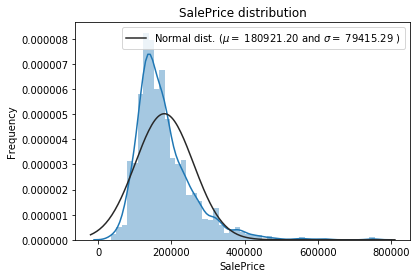

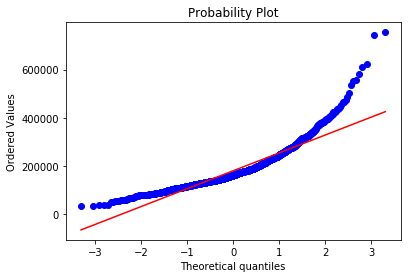

In [233]:
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()


In [234]:
"""
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
price = np.log1p(price)

#Check the new distribution 
sns.distplot(price , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(price)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
"""

"\n#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column\nprice = np.log1p(price)\n\n#Check the new distribution \nsns.distplot(price , fit=norm);\n\n# Get the fitted parameters used by the function\n(mu, sigma) = norm.fit(price)\nprint( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))\n\n#Now plot the distribution\nplt.legend(['Normal dist. ($\\mu=$ {:.2f} and $\\sigma=$ {:.2f} )'.format(mu, sigma)],\n            loc='best')\nplt.ylabel('Frequency')\nplt.title('SalePrice distribution')\n"

### Feature Observation

Now we take a look of the features.

In [235]:
#features = data.drop(['Id', 'SalePrice'], axis = 1)

print(data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

***Data types***

In terms of data type, there are four big groups:

Continuous numerical features: lengths, areas, prices
Discrete numerical features: numerical scores, number of bedrooms, years; they support order and arithmetic operations, so they can be treated as numerical
Ordinal categorical features: features with qualitative scores(such as 'Excellent', 'Good' and 'Fair').
Purely categorical features: a few examples are 'MSSubClass' or 'SaleType'

* `MSSubClass`: Discrete numerical feature.
* `MSZoning`: Purely categorical feature.
* `LotFrontage`: Continuous numerical feature.
* `LotArea`: Continuous numerical feature.
* `Street`: Purely categorical feature.
* `Alley`: Purely categorical feature.
* `LotShape`: Purely categorical feature.
* `LandContour`: Purely categorical feature.
* `Utilities`: Purely categorical feature.
* `LotConfig`: Purely categorical feature.
* `LandSlope`: Purely categorical feature.
* `Neighborhood`: Purely categorical feature.
* `Condition1`: Purely categorical feature.
* `Condition2`: Purely categorical feature.
* `BldgType`: Purely categorical feature.
* `HouseStyle`: Purely categorical feature.
* `OverallQual`: Discrete numerical feature.
* `OverallCond`: Discrete numerical feature.
* `YearBuilt`: Discrete numerical feature.
* `YearRemodAdd`: Discrete numerical feature.
* `RoofStyle`: Purely categorical feature.
* `RoofMatl`: Purely categorical feature.
* `Exterior1st`: Purely categorical feature.
* `Exterior2nd`: Purely categorical feature.
* `MasVnrType`: Purely categorical feature.
* `MasVnrArea`: Continuous numerical feature.
* `ExterQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `ExterCond`: Ordinal categorical feature. TA, Gd, Ex, Fa and Po.
* `Foundation`: Purely categorical feature.
* `BsmtQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `BsmtCond`: Ordinal categorical feature. TA, Gd, Fa and Po.
* `BsmtExposure`: Ordinal categorical feature. No, Av, Gd and Mn.
* `BsmtFinType1`: Ordinal categorical feature. Unf, GLQ, ALQ, BLQ, Rec and LwQ.
* `BsmtFinSF1`: Continuous numerical feature.
* `BsmtFinType2`: Ordinal categorical feature. Unf, GLQ, ALQ, BLQ, Rec and LwQ.
* `BsmtFinSF2`: Continuous numerical feature.
* `BsmtUnfSF`: Continuous numerical feature.
* `TotalBsmtSF`: Continuous numerical feature.
* `Heating`: Purely categorical feature.
* `HeatingQC`: Ordinal categorical feature.
* `CentralAir`: Purely categorical feature. Y and N.
* `Electrical`: Purely categorical feature. SBrkr, FuseA, FuseF, FuseP and Mix.
* `1stFlrSF`: Continuous numerical feature.
* `2ndFlrSF`: Continuous numerical feature.
* `LowQualFinSF`: Continuous numerical feature.
* `GrLivArea`: Continuous numerical feature.
* `BsmtFullBath`: Discrete numerical feature. 0, 1, 2 and 3.
* `BsmtHalfBath`: Discrete numerical feature. 0, 1 and 2.
* `FullBath`: Discrete numerical feature. 0, 1, 2 and 3.
* `HalfBath`: Discrete numerical feature. 0, 1 and 2.
* `BedroomAbvGr`: Discrete numerical feature. 0 to 8.
* `KitchenAbvGr`: Discrete numerical feature. 0, 1, 2 and 3.
* `KitchenQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `TotRmsAbvGrd`: Discrete numerical feature. 2 to 14.
* `Functional`: Purely categorical feature. Typ, Min1, Min2, Mod, Maj1, Maj2 and Sev.
* `Fireplaces`: Discrete numerical feature. 0, 1, 2 and 3.
* `FireplaceQu`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `GarageType`: Purely categorical feature. Attchd, Detchd, BuiltIn, Basment, CarPort and 2Types.
* `GarageYrBlt`: Discrete numerical feature.
* `GarageFinish`: Purely categorical feature. Unf, RFn and Fin.
* `GarageCars`: Discrete numerical feature. 0 to 4.
* `GarageArea`: Continuous numerical feature.
* `GarageQual`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `GarageCond`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `PavedDrive`: Discrete numerical feature. Y, N and P.
* `WoodDeckSF`: Continuous numerical feature.
* `OpenPorchSF`: Continuous numerical feature.
* `EnclosedPorch`: Continuous numerical feature.
* `3SsnPorch`: Continuous numerical feature.
* `ScreenPorch`: Continuous numerical feature.
* `PoolArea`: Continuous numerical feature.
* `PoolQC`: Ordinal categorical feature. Gd, Ex and Fa.
* `Fence`: Ordinal categorical feature. MnPrv, GdPrv, GdWo and MnWw.
* `MiscFeature`: Purely categorical feature. Shed, Gar2, Othr and TenC.
* `MiscVal`: Continuous numerical feature.
* `MoSold`: Discrete numerical feature. 1 to 12 month.
* `YrSold`: Discrete numerical feature.
* `SaleType`: Purely categorical feature. WD, New, COD, etc.
* `SaleCondition`: Purely categorical feature. Normal, Partial, Abnorml, Family, Alloca and AdjLand.

## Missing values

In [236]:
total_nans = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nans, percent], axis=1, keys=['Total', 'Percent'])
missing_data[total_nans > 0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [237]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)

#checking that there's no missing data missing...
data.isnull().sum().max() 

0

## Outliers

In [238]:
from sklearn.preprocessing import StandardScaler

#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


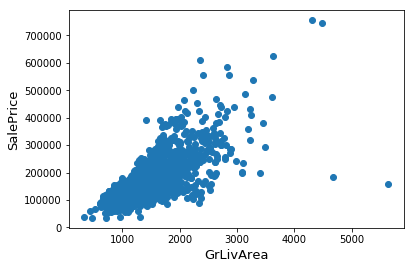

In [239]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

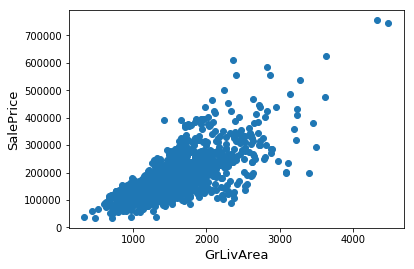

In [240]:
#Deleting outliers
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data['GrLivArea'], data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Adjusting the type of variableData transformation

There are a few features that are not represented with the right type of variable:

- `MSSubClass`: represented as an integer, when it is just a category label (we will use 'object' for now)
- `MoSold`: represented as an integer, a month is just a category label out of 12 possibilities (we will use 'object' for now)
- `BsmtFullBath`, `BsmtHalfBath`: these two represent integers and not floats (or I at least I do not know what a third of half bathroom is)
- years: a year, in the context of this dataset, is an integer, and not a float
- 'GarageCars': represented as a float, it is an actual integer (nobody wants to have 0.5 car at home)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 62 columns):
MSSubClass       1457 non-null int64
MSZoning         1457 non-null object
LotArea          1457 non-null int64
Street           1457 non-null object
LotShape         1457 non-null object
LandContour      1457 non-null object
Utilities        1457 non-null object
LotConfig        1457 non-null object
LandSlope        1457 non-null object
Neighborhood     1457 non-null object
Condition1       1457 non-null object
Condition2       1457 non-null object
BldgType         1457 non-null object
HouseStyle       1457 non-null object
OverallQual      1457 non-null int64
OverallCond      1457 non-null int64
YearBuilt        1457 non-null int64
YearRemodAdd     1457 non-null int64
RoofStyle        1457 non-null object
RoofMatl         1457 non-null object
Exterior1st      1457 non-null object
Exterior2nd      1457 non-null object
ExterQual        1457 non-null object
ExterCond        1457 non

In [242]:
data['MSSubClass'] = data['MSSubClass'].astype('object', copy=False)
data['MoSold'] = data['MoSold'].astype('object', copy=False)
#data['BsmtFullBath'] = data['BsmtFullBath'].astype('int64', copy=False)
#data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('int64', copy=False)
#data['GarageCars'] = data['GarageCars'].astype('int64', copy=False)
#years = ['YearBuilt', 'YearRemodAdd', 'YrSold']
#data[years] = data[years].astype('int64', copy=False)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 62 columns):
MSSubClass       1457 non-null object
MSZoning         1457 non-null object
LotArea          1457 non-null int64
Street           1457 non-null object
LotShape         1457 non-null object
LandContour      1457 non-null object
Utilities        1457 non-null object
LotConfig        1457 non-null object
LandSlope        1457 non-null object
Neighborhood     1457 non-null object
Condition1       1457 non-null object
Condition2       1457 non-null object
BldgType         1457 non-null object
HouseStyle       1457 non-null object
OverallQual      1457 non-null int64
OverallCond      1457 non-null int64
YearBuilt        1457 non-null int64
YearRemodAdd     1457 non-null int64
RoofStyle        1457 non-null object
RoofMatl         1457 non-null object
Exterior1st      1457 non-null object
Exterior2nd      1457 non-null object
ExterQual        1457 non-null object
ExterCond        1457 no

## Skewed features

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 180942.14 and sigma = 79494.28



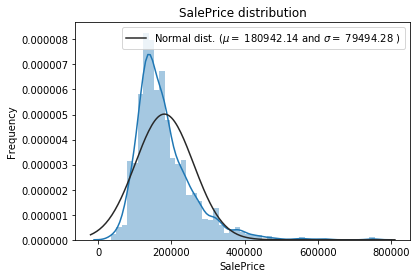

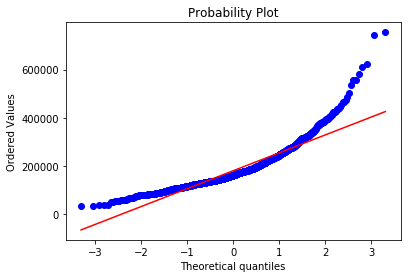

In [245]:
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

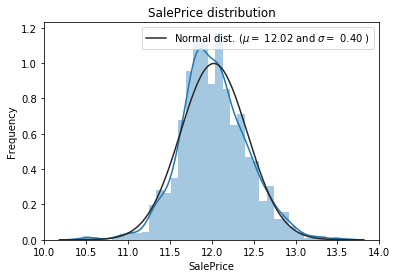

In [246]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#price = np.log1p(price)
data['SalePrice'] = np.log(data['SalePrice'])

#Check the new distribution 
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [248]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.426546
PoolArea,15.927003
LotArea,12.556596
3SsnPorch,10.282886
LowQualFinSF,8.992490
KitchenAbvGr,4.478508
BsmtFinSF2,4.245879
ScreenPorch,4.113045
BsmtHalfBath,4.094248
EnclosedPorch,3.082631


In [173]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lm = 0.15
for feature in skewed_features:
    data[feature] = boxcox1p(data[feature], lm)

 ## Dummy encoding

In [174]:
price = data['SalePrice']
data.drop(['SalePrice'], axis = 1, inplace = True)
final_data = pd.get_dummies(data)
print(final_data.shape)

(1457, 244)


In [175]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, SGDRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
#import xgboost as xgb
#import lightgbm as lgb

### Performance Metric

### Define a cross validation strategy

In [176]:
X_train, X_test, y_train, y_test = train_test_split(final_data, price, test_size=0.25, random_state=42)

#Validation function
n_folds = 4

def r2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv = kf)
    return(r2_scores)

### Benchmark Model: Lasso

In [178]:
LR = LinearRegression()
score_lr = r2_cv(LR)
print(score_lr)

[ 8.92685471e-01  8.76311168e-01 -4.80073460e+18 -4.96924607e+18]


In [249]:
from sklearn.linear_model import Lasso
lasso = Lasso()
score = r2_cv(lasso)
print("\nLasso score: {:.4f}".format(score.mean()))


Lasso score: -0.0002


In [250]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
score = r2_cv(dtr)
print("dtr score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

dtr score: 0.6932 (0.0170)



In [251]:
from sklearn.svm import SVR

svr = SVR()
score = r2_cv(svr)
print("svr score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

svr score: 0.4076 (0.0453)



In [252]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
score = r2_cv(ada)
print("ada score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ada score: 0.8049 (0.0138)



In [253]:
from sklearn.kernel_ridge import KernelRidge

KRR = KernelRidge()
score = r2_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.9048 (0.0055)



In [254]:
GBoost = GradientBoostingRegressor()
score = r2_cv(GBoost)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.8972 (0.0127)



### Model Tuning

In [ ]:
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}

In [ ]:
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared


#reg = GradientBoostingRegressor()
reg = KernelRidge()

param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}

"""param_grid = { 'n_estimators': [300,500,800], 
              'alpha': [0.5,0.7,0.9],
              'max_depth': [3,5,8], 
              'learning_rate': [0.05,0.1,0.2] }"""

grid_obj = GridSearchCV(reg, param_grid=param_grid, scoring='r2', cv=5)

grid_fit = grid_obj.fit(X_train, y_train)

best_reg = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (reg.fit(X_train, y_train)).predict(X_test)
best_predictions = best_reg.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print(r2_score(y_test, predictions))
print("\nOptimized Model\n------")
print(r2_score(y_test, best_predictions))

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

In [ ]:
grid_obj.best_params_

Unoptimized model

0.9005532673070311

Optimized Model

0.9081757574010025

{'alpha': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 800}

In [ ]:
regg = GradientBoostingRegressor(loss='ls', learning_rate=0.1, 
                                 n_estimators=1000, subsample=1.0, 
                                 criterion='friedman_mse', min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                 max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, 
                                 init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, 
                                 max_leaf_nodes=None, warm_start=False, presort='auto')

predictionss = (regg.fit(X_train, y_train)).predict(X_test)
print(r2_score(y_test, predictionss))